# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [179]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [180]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [181]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Filter apartments

In [182]:
# Filter apartments (replace '<= 5000' by the respective operator and quantile)
quantile_90_pop_dens = df_orig['pop_dens'].quantile(0.90).round(2)



df = df_orig.loc[df_orig['pop_dens'] >= quantile_90_pop_dens]

df

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
10,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",47.370792,8.514748,261,Zürich,2.0,49.0,0,4335.0,88.47,420217,4778.994655,491193.0,32.458468,82932.737704
11,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich,2.0,32.0,0,3515.0,109.84,420217,4778.994655,491193.0,32.458468,82932.737704
12,1693998205-32,"Maneggstrasse 87, 8041 Zürich, ZH",47.337914,8.520034,261,Zürich,3.5,98.0,0,3121.0,31.85,420217,4778.994655,491193.0,32.458468,82932.737704
13,1693998205-36,"Albisriederstrasse 392a, 8047 Zürich, ZH",47.374695,8.482722,261,Zürich,5.5,192.0,0,4960.0,25.83,420217,4778.994655,491193.0,32.458468,82932.737704
14,1693998205-43,"Limmatstrasse 260, 8005 Zürich, ZH",47.389133,8.525842,261,Zürich,4.5,170.0,0,6600.0,38.82,420217,4778.994655,491193.0,32.458468,82932.737704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1693998377-980,"Ankerstrasse 114, 8004 Zürich, ZH",47.376247,8.528150,261,Zürich,3.5,78.0,0,4750.0,60.90,420217,4778.994655,491193.0,32.458468,82932.737704
269,1693998381-989,"Winzerhalde 99, 8049 Zürich, ZH",47.403000,8.483833,261,Zürich,2.5,70.0,0,2315.0,33.07,420217,4778.994655,491193.0,32.458468,82932.737704
270,1693998381-995,"Eggbühlstrasse 9, 8050 Zürich, ZH",47.416164,8.544422,261,Zürich,2.5,73.0,0,2565.0,35.14,420217,4778.994655,491193.0,32.458468,82932.737704
271,1693998381-1004,"Hölderlinstrasse 12, 8032 Zürich, ZH",47.366356,8.564249,261,Zürich,3.5,82.0,0,2830.0,34.51,420217,4778.994655,491193.0,32.458468,82932.737704


### Shape (number of rows and colums)

In [183]:
# Number of rows and columns
print(df.shape)

(263, 16)


### Data types

In [184]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [185]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,263.000000,263.000000,263.0,263.000000,263.000000,263.000000,263.000000,263.000000,263.0,2.630000e+02,263.0,263.000000,2.630000e+02
mean,47.382943,8.529864,261.0,2.941065,76.600760,0.015209,3211.650190,47.484183,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
std,0.020613,0.028212,0.0,1.294935,41.274407,0.122617,1692.378555,21.154130,0.0,9.112287e-13,0.0,0.000000,1.457966e-11
min,47.323917,8.470620,261.0,1.000000,10.000000,0.000000,10.000000,0.050000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
25%,47.366739,8.514822,261.0,2.000000,48.000000,0.000000,2128.500000,34.380000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
50%,47.380440,8.531120,261.0,2.500000,70.000000,0.000000,2900.000000,41.880000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
75%,47.399429,8.552003,261.0,3.500000,97.000000,0.000000,3735.500000,53.140000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
max,47.431305,8.590806,261.0,8.500000,250.000000,1.000000,9950.000000,149.900000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [186]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 263 Min: 10.0 Max: 9950.0 Mean: 3211.7 Median: 2900.0 Std: 1692.4
Area: Count: 263 Min: 10.0 Max: 250.0 Mean: 76.6 Median: 70.0 Std: 41.3


### Skewness

In [187]:
df[['price','rooms', 'area']].skew()

price    1.530282
rooms    0.763137
area     0.974600
dtype: float64

### Kurtosis

In [188]:
df[['price','rooms', 'area']].kurtosis()

price    2.823839
rooms    1.377652
area     1.312099
dtype: float64

### With Outlines

In [189]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,263.000000,263.000000,263.0,263.000000,263.000000,263.000000,263.000000,263.000000,263.0,2.630000e+02,263.0,263.000000,2.630000e+02
mean,47.382943,8.529864,261.0,2.941065,76.600760,0.015209,3211.650190,47.484183,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
std,0.020613,0.028212,0.0,1.294935,41.274407,0.122617,1692.378555,21.154130,0.0,9.112287e-13,0.0,0.000000,1.457966e-11
min,47.323917,8.470620,261.0,1.000000,10.000000,0.000000,10.000000,0.050000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
25%,47.366739,8.514822,261.0,2.000000,48.000000,0.000000,2128.500000,34.380000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
50%,47.380440,8.531120,261.0,2.500000,70.000000,0.000000,2900.000000,41.880000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
75%,47.399429,8.552003,261.0,3.500000,97.000000,0.000000,3735.500000,53.140000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
max,47.431305,8.590806,261.0,8.500000,250.000000,1.000000,9950.000000,149.900000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04


### Extreme values

In [190]:
# Low costs apartments
df[df['price_per_m2'] <= 10]





,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
183,1693998317-653,"8001 Zürich, ZH",47.374966,8.543989,261,Zürich,4.5,137.0,0,16.0,0.12,420217,4778.994655,491193.0,32.458468,82932.737704
198,1693998326-702,"Hohenbühlstrasse 7, 8032 Zürich, ZH",47.366306,8.551867,261,Zürich,5.5,183.0,0,10.0,0.05,420217,4778.994655,491193.0,32.458468,82932.737704


### Remove apartments with low price per m2

In [191]:
df = df.loc[df['price_per_m2'] >= 10]

df

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
10,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",47.370792,8.514748,261,Zürich,2.0,49.0,0,4335.0,88.47,420217,4778.994655,491193.0,32.458468,82932.737704
11,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich,2.0,32.0,0,3515.0,109.84,420217,4778.994655,491193.0,32.458468,82932.737704
12,1693998205-32,"Maneggstrasse 87, 8041 Zürich, ZH",47.337914,8.520034,261,Zürich,3.5,98.0,0,3121.0,31.85,420217,4778.994655,491193.0,32.458468,82932.737704
13,1693998205-36,"Albisriederstrasse 392a, 8047 Zürich, ZH",47.374695,8.482722,261,Zürich,5.5,192.0,0,4960.0,25.83,420217,4778.994655,491193.0,32.458468,82932.737704
14,1693998205-43,"Limmatstrasse 260, 8005 Zürich, ZH",47.389133,8.525842,261,Zürich,4.5,170.0,0,6600.0,38.82,420217,4778.994655,491193.0,32.458468,82932.737704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1693998377-980,"Ankerstrasse 114, 8004 Zürich, ZH",47.376247,8.528150,261,Zürich,3.5,78.0,0,4750.0,60.90,420217,4778.994655,491193.0,32.458468,82932.737704
269,1693998381-989,"Winzerhalde 99, 8049 Zürich, ZH",47.403000,8.483833,261,Zürich,2.5,70.0,0,2315.0,33.07,420217,4778.994655,491193.0,32.458468,82932.737704
270,1693998381-995,"Eggbühlstrasse 9, 8050 Zürich, ZH",47.416164,8.544422,261,Zürich,2.5,73.0,0,2565.0,35.14,420217,4778.994655,491193.0,32.458468,82932.737704
271,1693998381-1004,"Hölderlinstrasse 12, 8032 Zürich, ZH",47.366356,8.564249,261,Zürich,3.5,82.0,0,2830.0,34.51,420217,4778.994655,491193.0,32.458468,82932.737704


In [192]:
# Very expansive apartments
df[df['price_per_m2'] <= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
10,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",47.370792,8.514748,261,Zürich,2.0,49.0,0,4335.0,88.47,420217,4778.994655,491193.0,32.458468,82932.737704
12,1693998205-32,"Maneggstrasse 87, 8041 Zürich, ZH",47.337914,8.520034,261,Zürich,3.5,98.0,0,3121.0,31.85,420217,4778.994655,491193.0,32.458468,82932.737704
13,1693998205-36,"Albisriederstrasse 392a, 8047 Zürich, ZH",47.374695,8.482722,261,Zürich,5.5,192.0,0,4960.0,25.83,420217,4778.994655,491193.0,32.458468,82932.737704
14,1693998205-43,"Limmatstrasse 260, 8005 Zürich, ZH",47.389133,8.525842,261,Zürich,4.5,170.0,0,6600.0,38.82,420217,4778.994655,491193.0,32.458468,82932.737704
15,1693998210-54,"Hagenholzstrasse 100, 8050 Zürich, ZH",47.414215,8.558320,261,Zürich,4.5,141.0,0,3309.0,23.47,420217,4778.994655,491193.0,32.458468,82932.737704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1693998377-980,"Ankerstrasse 114, 8004 Zürich, ZH",47.376247,8.528150,261,Zürich,3.5,78.0,0,4750.0,60.90,420217,4778.994655,491193.0,32.458468,82932.737704
269,1693998381-989,"Winzerhalde 99, 8049 Zürich, ZH",47.403000,8.483833,261,Zürich,2.5,70.0,0,2315.0,33.07,420217,4778.994655,491193.0,32.458468,82932.737704
270,1693998381-995,"Eggbühlstrasse 9, 8050 Zürich, ZH",47.416164,8.544422,261,Zürich,2.5,73.0,0,2565.0,35.14,420217,4778.994655,491193.0,32.458468,82932.737704
271,1693998381-1004,"Hölderlinstrasse 12, 8032 Zürich, ZH",47.366356,8.564249,261,Zürich,3.5,82.0,0,2830.0,34.51,420217,4778.994655,491193.0,32.458468,82932.737704


### Remove very expensive apartments

In [193]:
# Very expansive apartments
df = df.loc[df['price_per_m2'] <= 100]

### Get a list of categories of categorical variable

In [194]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Zürich'], dtype=object)

### Without Outliners

In [195]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,255.000000,255.000000,255.0,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,2.550000e+02,255.0,255.000000,2.550000e+02
mean,47.383450,8.529479,261.0,2.960784,77.207843,0.015686,3244.447059,46.003961,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
std,0.020648,0.028473,0.0,1.279160,40.349847,0.124503,1685.272808,17.000007,0.0,9.112833e-13,0.0,0.000000,1.458053e-11
min,47.323917,8.470620,261.0,1.000000,14.000000,0.000000,820.000000,19.440000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
25%,47.367081,8.514485,261.0,2.000000,50.000000,0.000000,2165.000000,34.380000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
50%,47.382877,8.530695,261.0,2.500000,70.000000,0.000000,2900.000000,41.380000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
75%,47.399893,8.551136,261.0,3.500000,97.000000,0.000000,3735.500000,51.955000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
max,47.431305,8.590806,261.0,8.500000,250.000000,1.000000,9950.000000,100.000000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04


## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [196]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.5,7.0,7.5,8.5
luxurious,,,,,,,,,,,,,,
0,23,25,23,55,10,60,16,28,1,4,2,2,1,1
1,0,0,0,3,0,1,0,0,0,0,0,0,0,0


### Pivot tables

In [197]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            23   25.608696    23  1399.652174           23  58.386522
1.5   0            25   35.920000    25  2067.840000           25  62.752800
2.0   0            23   53.782609    23  2418.347826           23  47.986087
2.5   0            55   62.309091    55  3008.690909           55  49.154727
      1             3   78.666667     3  4345.333333            3  56.290000
3.0   0            10   74.300000    10  2858.100000           10  38.413000
3.5   0            60   91.783333    60  3545.300000           60  38.944167
      1             1  100.000000     1  9150.000000            1  91.500000
4.0   0            16   93.875000    16  3164.250000           16  33.489375
4.5   0            28  127.500000    28  5145.821429           28  39.740000
5.0   0             1  110.000000     1  3690.000000            1  33.550000
5.5   0             4  150.750000     4  5428.750000            4  36.957500
6.5   0             2  200.500000     2  6075.000000            2  30.790000
7.0   0             2  175.000000     2  6350.000000            2  36.325000
7.5   0             1  205.000000     1  5395.000000            1  26.320000
8.5   0             1  210.000000     1  8500.000000            1  40.480000

### Correlation matrix

In [198]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.999999,0.999835,0.988723,-0.732531,NaN
area,0.999999,1.000000,0.999863,0.988972,-0.732472,NaN
price,0.999835,0.999863,1.000000,0.991275,-0.731718,NaN
price_per_m2,0.988723,0.988972,0.991275,1.000000,-0.722486,NaN
pop_dens,-0.732531,-0.732472,-0.731718,-0.722486,1.000000,NaN
frg_pct,NaN,NaN,NaN,NaN,NaN,NaN


### Covariance matrix

In [199]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.636251e+00,4.506921e+01,1.375370e+03,-9.511694e+00,1.272116e-28,0.0
area,4.506921e+01,1.628110e+03,5.158942e+04,-3.086426e+02,4.528732e-27,0.0
price,1.375370e+03,5.158942e+04,2.840144e+06,3.885418e+03,-6.969159e-25,0.0
price_per_m2,-9.511694e+00,-3.086426e+02,3.885418e+03,2.890002e+02,3.816348e-28,0.0
pop_dens,1.272116e-28,4.528732e-27,-6.969159e-25,3.816348e-28,8.304372e-25,0.0
frg_pct,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

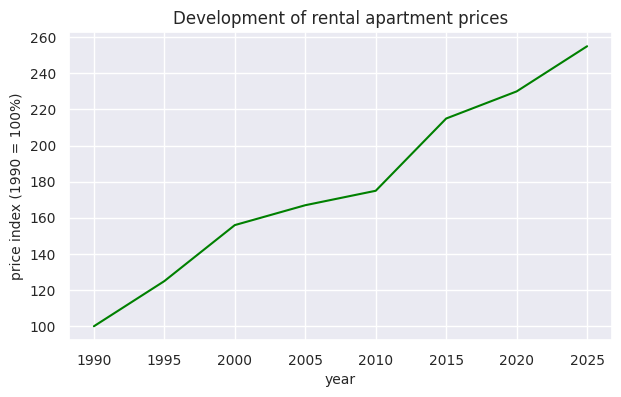

In [200]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

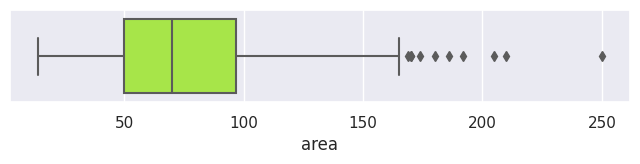

In [201]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

<Axes: xlabel='price_per_m2'>

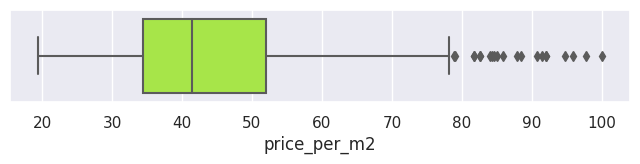

In [202]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price_per_m2'], color="greenyellow")

### Histogram  (matplotlib)

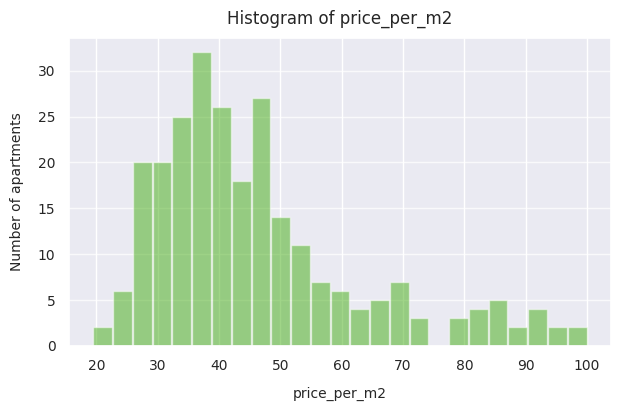

In [203]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

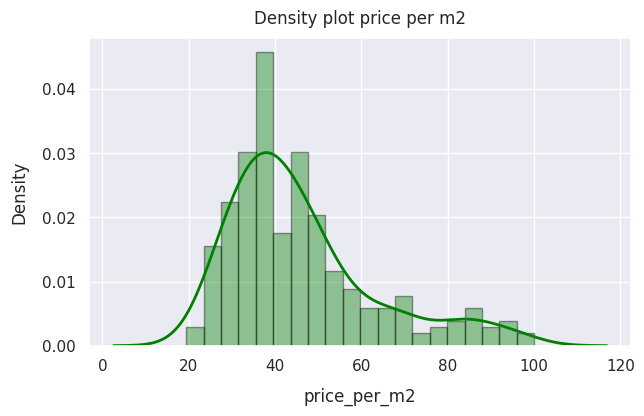

In [204]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
190   14.0 -1.566495
154   15.0 -1.541712
52    15.0 -1.541712
217   16.0 -1.516929
121   17.0 -1.492146
..     ...       ...
130  186.0  2.696222
13   192.0  2.844922
65   205.0  3.167104
26   210.0  3.291020
205  250.0  4.282350

[255 rows x 2 columns]


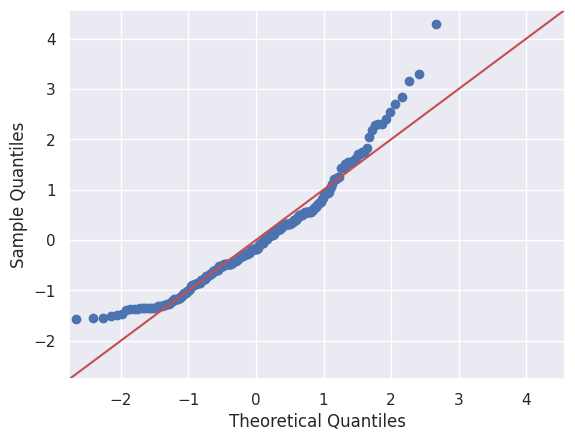

In [205]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [206]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[8.5, 7.5, 5.0, 7.0, 6.5, 5.5, 3.0, 4.0, 2.0, 1.0, 1.5, 4.5, 2.5, 3.5]

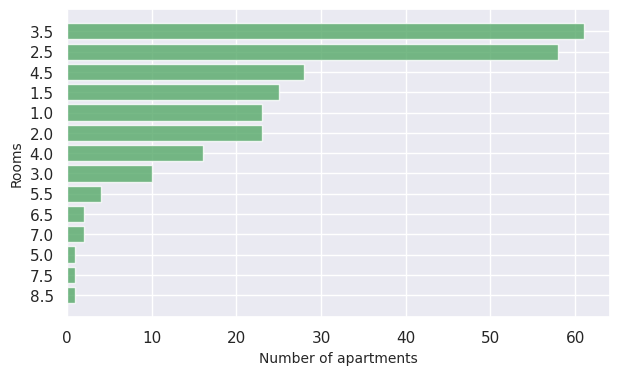

In [207]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

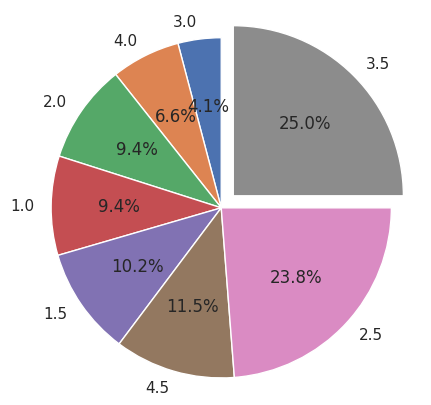

In [208]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

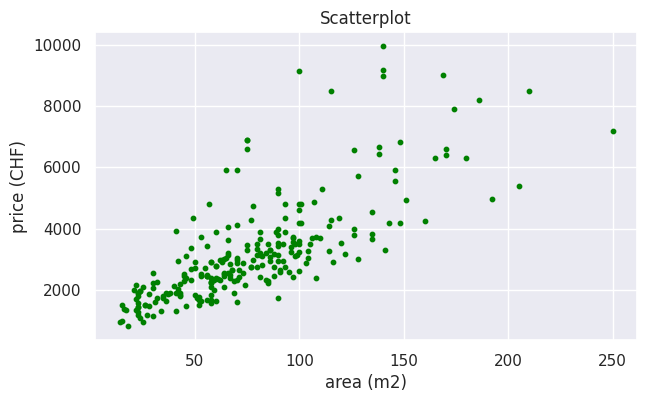

In [209]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(251, 17)
31.432366752550546
824.7477839919054


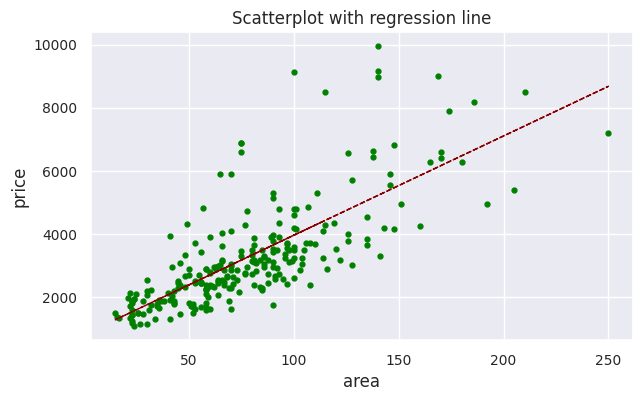

In [210]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

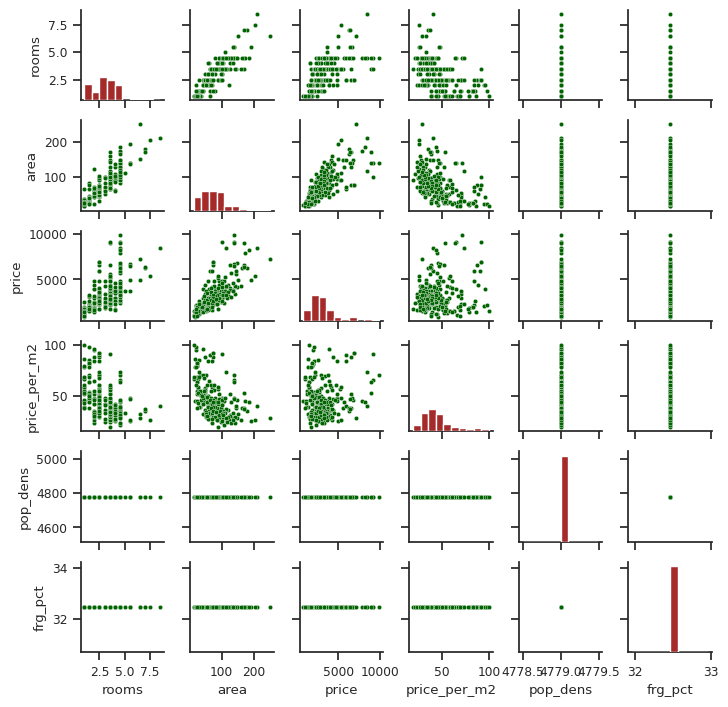

In [211]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(233, 17)


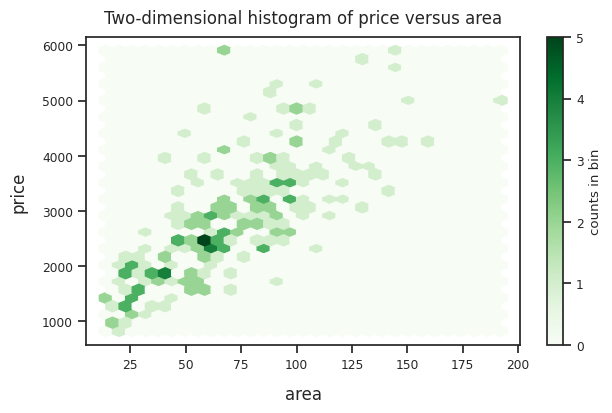

In [212]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

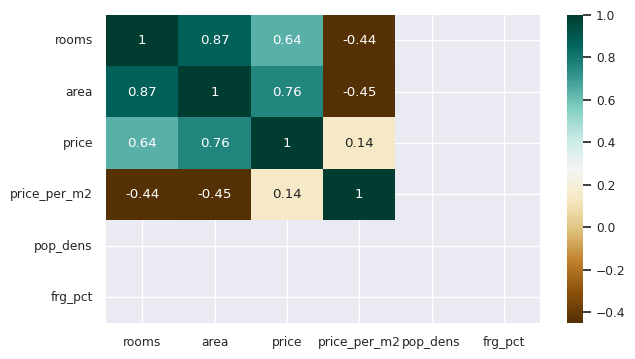

In [213]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

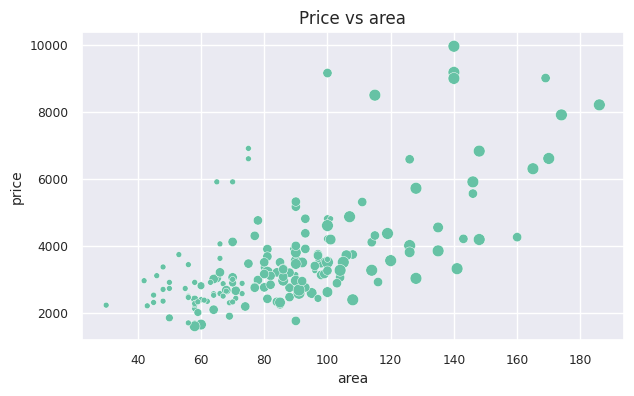

In [214]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

In [215]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income,var
count,255.000000,255.000000,255.0,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,2.550000e+02,255.0,255.000000,2.550000e+02,2.550000e+02
mean,47.383450,8.529479,261.0,2.960784,77.207843,0.015686,3244.447059,46.003961,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04,9.752547e-17
std,0.020648,0.028473,0.0,1.279160,40.349847,0.124503,1685.272808,17.000007,0.0,9.112833e-13,0.0,0.000000,1.458053e-11,1.000000e+00
min,47.323917,8.470620,261.0,1.000000,14.000000,0.000000,820.000000,19.440000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04,-1.566495e+00
25%,47.367081,8.514485,261.0,2.000000,50.000000,0.000000,2165.000000,34.380000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04,-6.742985e-01
50%,47.382877,8.530695,261.0,2.500000,70.000000,0.000000,2900.000000,41.380000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04,-1.786337e-01
75%,47.399893,8.551136,261.0,3.500000,97.000000,0.000000,3735.500000,51.955000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04,4.905138e-01
max,47.431305,8.590806,261.0,8.500000,250.000000,1.000000,9950.000000,100.000000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04,4.282350e+00


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [216]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 5.15.0-1041-azure
Datetime: 2023-10-10 19:46:09
Python Version: 3.10.13
-----------------------------------
